In [86]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import seaborn as sns # library for data visualization and representation

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import math # library for mathematical operations
%matplotlib inline


print('Libraries imported.')

Libraries imported.


#### Load and explore the data

Next, let's load the data.

In [87]:
fuel_data=pd.read_csv(r'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv',
                      error_bad_lines=False) 

In [88]:
# Viewing the first five (5) rows of the data
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


# Question 1

In [89]:
# How do you create an identity matrix in python?

# prints identity matrix
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

# Question 2 

In [90]:
# The feature with missing values falls under what category? What missing value imputation technique would you use?


fuel_data.fuel_unit.fillna(fuel_data['fuel_unit'].mode()[0])

0        ton
1        ton
2        ton
3        ton
4        mcf
        ... 
29518    mcf
29519    mcf
29520    mcf
29521    ton
29522    mcf
Name: fuel_unit, Length: 29523, dtype: object

# Question 3 

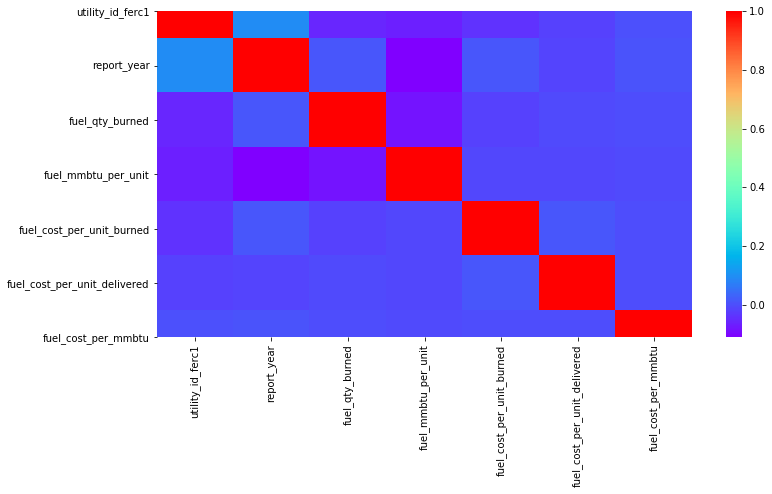

In [91]:
plt.figure(figsize=(12,6))
sns.heatmap(fuel_data.corr(),cmap='rainbow') # checking correlation between features of the fuel data

In [92]:
# Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?

# the second and third lowest correlation
fuel_data[fuel_data.columns[1:]].corr()['fuel_cost_per_unit_burned'].sort_values(ascending=False).tail(3)[:-1] 

fuel_mmbtu_per_unit   -0.010034
fuel_qty_burned       -0.018535
Name: fuel_cost_per_unit_burned, dtype: float64

# Question 4 

In [93]:
# For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994?

# Average fuel cost per unit burned for coal in 1994
d1994 = fuel_data[(fuel_data['report_year']==1994) & (fuel_data['fuel_type_code_pudl']=='coal')]
data_94sum = data1994['fuel_cost_per_unit_burned'].sum()

# Average fuel cost per unit burned for coal in 1998
d1998 = fuel_data[(fuel_data['report_year']==1998) & (fuel_data['fuel_type_code_pudl']=='coal')]
data_98sum = data1998['fuel_cost_per_unit_burned'].sum()
 
# percent change in the averages 
pchange = ((data_98sum - data_94sum)/data_98sum)*100


print('Percentage: ',math.ceil(pchange),'%')

Percentage:  -25 %


# Question 5 

In [94]:
# Which year has the highest average fuel cost per unit delivered?

ans = fuel_data.groupby('report_year')['fuel_cost_per_unit_delivered'].mean()

print('The year', ans.idxmax(), 'has the highest average fuel cost per unit delivered')

The year 1997 has the highest average fuel cost per unit delivered


# Question 6 

In [95]:
# What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?

fuel_data['fuel_mmbtu_per_unit'].describe().round(2).loc[['std','75%']] 

std    10.60
75%    17.01
Name: fuel_mmbtu_per_unit, dtype: float64

# Question 7

In [96]:
# What is the skewness and kurtosis for the fuel quantity burned in two decimal places?

fuel_data['fuel_qty_burned'].agg(['skew','kurt']).round(2) # Skewness and Kurtosis

skew     15.85
kurt    651.37
Name: fuel_qty_burned, dtype: float64

## QUESTION 8

In [97]:
# Dimensionality of the data
print('The dataframe has {} rows and {} columns.'.format(
        fuel_data.shape[0],
        fuel_data.shape[1]
    )
)

The dataframe has 29523 rows and 11 columns.


In [98]:
# Checking for the presence of null values per column
fuel_data.isnull().any()

record_id                       False
utility_id_ferc1                False
report_year                     False
plant_name_ferc1                False
fuel_type_code_pudl             False
fuel_unit                        True
fuel_qty_burned                 False
fuel_mmbtu_per_unit             False
fuel_cost_per_unit_burned       False
fuel_cost_per_unit_delivered    False
fuel_cost_per_mmbtu             False
dtype: bool

In [99]:
# Checking for the total amount of null values in fuel unit column
fuel_data.isnull().sum()['fuel_unit']

180

In [100]:
# Percent of null values to the total amount of rows
nullval=fuel_data.isnull().sum()['fuel_unit']
totalrows=fuel_data.shape[0]

percentage = '{0:.3f}'.format((nullval / totalrows * 100)) 


print('Percentage: ',percentage,'%') #percent in 3 decimal places

Percentage:  0.610 %


# Question 9

In [101]:
# Which of the following fuel type code has the lowest average fuel cost per unit burned?

# group by fuel type and print out the minimum mean and the fuel type attached to it
fuelgrp=fuel_data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean()

print('fuel type is: ',fuelgrp.idxmin(),'and the minimum mean is: ',fuelgrp.min()) 

fuel type is:  gas and the minimum mean is:  13.659396569737135


# Question 10

In [102]:

# list A and B
A = [1,2,3,4,5,6]
B = [13,21,34]
 
# extending A with B
A.extend(B)
A_B=A
print(A_B)

[1, 2, 3, 4, 5, 6, 13, 21, 34]
